# CMPS-320 Homework #3
## Linear Regression Practice
Elijah Campbell-Ihim

10/30/23

## Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
plt.style.use('seaborn-v0_8-white')

In [51]:
baseball = pd.read_table('http://jse.amstat.org/datasets/baseball.dat.txt',
header = None, sep= "\s+", names =["salary", "batting.avg", "OBP", "runs", "hits",
"doubles", "triples", "homeruns", "RBI", "walks", "strike.outs",
"stolen.bases", "errors", "free.agency.elig", "free.agent.91",
"arb.elig", "arb.91", "name"])
baseball.head()

,salary,batting.avg,OBP,runs,hits,doubles,triples,homeruns,RBI,walks,strike.outs,stolen.bases,errors,free.agency.elig,free.agent.91,arb.elig,arb.91,name
0,3300,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0,Andre Dawson
1,2600,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0,Steve Buchele
2,2500,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0,Kal Daniels
3,2475,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0,Shawon Dunston
4,2313,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0,Mark Grace


## Step 1: Exploratory Data Analysis
### Histogram of Salaries and ln(Salaries)

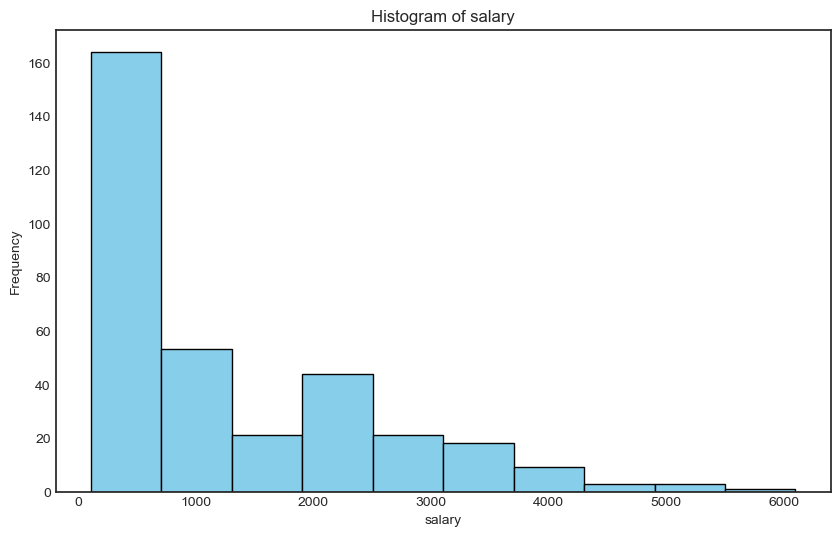

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(baseball["salary"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("salary")
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format("salary"))
plt.show()

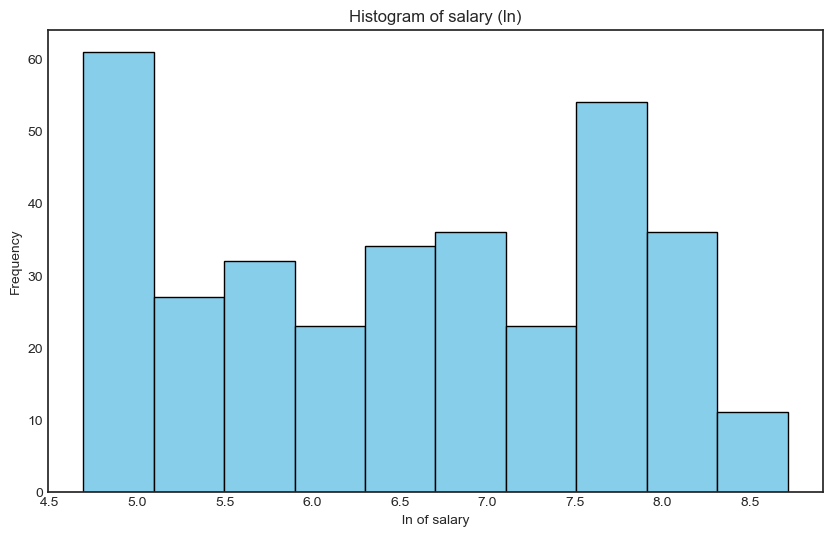

In [53]:
salaryln = np.log(baseball["salary"])

plt.figure(figsize=(10, 6))
plt.hist(salaryln, bins=10, color='skyblue', edgecolor='black')
plt.xlabel("ln of salary")
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format("salary (ln)"))
plt.show()

The ln of the salaries is a better metric for quantifying salary, as the data is more evenly distributed. The unchanged salary data is heavily skewed towards 0, as only a few players make a lot of money. It is better to use the natural log of the salaries for our ML model, as the data is nicely spread out and unskewed. 

In [54]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   salary            337 non-null    int64  
 1   batting.avg       337 non-null    float64
 2   OBP               337 non-null    float64
 3   runs              337 non-null    int64  
 4   hits              337 non-null    int64  
 5   doubles           337 non-null    int64  
 6   triples           337 non-null    int64  
 7   homeruns          337 non-null    int64  
 8   RBI               337 non-null    int64  
 9   walks             337 non-null    int64  
 10  strike.outs       337 non-null    int64  
 11  stolen.bases      337 non-null    int64  
 12  errors            337 non-null    int64  
 13  free.agency.elig  337 non-null    int64  
 14  free.agent.91     337 non-null    int64  
 15  arb.elig          337 non-null    int64  
 16  arb.91            337 non-null    int64  
 1

The data does not have any missing values, as indicated by the non-null count of each column displayed in the info() function. The predictors consists of the following numerical types: 3 continuous (bat avg, OBP, RBI), 9 integer counts (runs, hits, doubles, triples, homeruns, walks, strikeouts, stolen bases, errors), 5 categorical (free agency elig, free agency 91, arb elig, arb 91, name). Since we will not be using the name column for our predictions, we can drop it, making the number of categorical variables 4 instead of 5. 

In [55]:
baseball = baseball.drop("name", axis = 1)

## Step 2: Linear Regression with variable selection and Regularization

In [56]:
X = baseball.drop("salary", axis = 1)
y = salaryln

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3, random_state=42)
feature_names = baseball.columns.tolist()

In [57]:
from sklearn.linear_model import LassoCV

# Fit Lasso Regression
lasso = LassoCV(random_state=42)
lasso.fit(X_train, y_train)

# Selected features and corresponding coefficients
lasso_selected_variables = [i for i, coef in enumerate(lasso.coef_) if coef != 0]
lasso_coefficients = lasso.coef_[lasso_selected_variables]

#Output which features were selected and their coefficients
lasso_features = [feature_names[i] for i in lasso_selected_variables]
print("Lasso Regression - Selected Variables:", lasso_features)
print("Lasso Regression - Coefficients:", lasso_coefficients)

Lasso Regression - Selected Variables: ['OBP', 'runs', 'hits', 'triples', 'homeruns', 'RBI', 'walks', 'strike.outs', 'stolen.bases', 'errors', 'free.agent.91']
Lasso Regression - Coefficients: [-5.06095323e-03  7.96217923e-03 -1.07446652e-03  7.09663132e-03
  9.97867422e-03  5.14122367e-03 -4.00604774e-03  2.22408322e-03
 -1.10369853e-02  1.16796513e+00  8.45172582e-01]


In [58]:
from sklearn.linear_model import RidgeCV

# Fit Ridge Regression
ridge = RidgeCV()
ridge.fit(X_train, y_train)

# Selected features and corresponding coefficients
ridge_selected_variables = [i for i, coef in enumerate(ridge.coef_) if coef != 0]
ridge_coefficients = ridge.coef_[ridge_selected_variables]

#Output which features were selected and their coefficients
ridge_features = [feature_names[i] for i in ridge_selected_variables]
print("Lasso Regression - Selected Variables:", ridge_features)
print("Lasso Regression - Coefficients:", ridge_coefficients)

Lasso Regression - Selected Variables: ['salary', 'batting.avg', 'OBP', 'runs', 'hits', 'doubles', 'triples', 'homeruns', 'RBI', 'walks', 'strike.outs', 'stolen.bases', 'errors', 'free.agency.elig', 'free.agent.91', 'arb.elig']
Lasso Regression - Coefficients: [-0.23770188 -0.28479209 -0.00718479  0.00813509 -0.0040816  -0.01170768
  0.00419742  0.0100036   0.00539888 -0.00330066  0.00348827 -0.01192734
  1.62436446 -0.40739916  1.29036208 -0.08642479]


In [59]:
from sklearn.linear_model import ElasticNetCV

#Fit Elastic Net Regression
elastic_net = ElasticNetCV()  
elastic_net.fit(X_train, y_train)

#Selected features and corresponding coefficients
elastic_net_selected_variables = [i for i, coef in enumerate(elastic_net.coef_) if coef != 0]
elastic_net_coefficients = elastic_net.coef_[elastic_net_selected_variables]

#Output which features were selected and their coefficients
elastic_net_features = [feature_names[i] for i in elastic_net_selected_variables]
print("Lasso Regression - Selected Variables:", elastic_net_features)
print("Lasso Regression - Coefficients:", elastic_net_coefficients)

Lasso Regression - Selected Variables: ['OBP', 'runs', 'hits', 'triples', 'homeruns', 'RBI', 'walks', 'strike.outs', 'stolen.bases', 'errors', 'free.agent.91']
Lasso Regression - Coefficients: [-0.00497252  0.0094309  -0.00288074  0.00872511  0.01004131  0.0054956
 -0.00459972  0.00157519 -0.01090474  0.87064148  0.53632966]


In [60]:
from sklearn.metrics import mean_squared_error

# Predictions
lasso_predictions = lasso.predict(X_test)
ridge_predictions = ridge.predict(X_test)
elastic_net_predictions = elastic_net.predict(X_test)

# Calculate MSE
lasso_mse = mean_squared_error(y_test, lasso_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
elastic_net_mse = mean_squared_error(y_test, elastic_net_predictions)

print("Lasso Regression MSE:", lasso_mse)
print("Ridge Regression MSE:", ridge_mse)
print("Elastic Net MSE:", elastic_net_mse)

# Identify the best model
best_model = min(lasso_mse, ridge_mse, elastic_net_mse)
if best_model == lasso_mse:
    print("Best Model: Lasso Regression")
elif best_model == ridge_mse:
    print("Best Model: Ridge Regression")
else:
    print("Best Model: Elastic Net")


Lasso Regression MSE: 0.32530531457400436
Ridge Regression MSE: 0.33334832111181945
Elastic Net MSE: 0.3752280797689328
Best Model: Lasso Regression


## Refit model using all data

In [61]:
#Fit data to new model
fit_final = LassoCV(random_state=42)
fit_final.fit(X, y)

# Selected features and corresponding coefficients
fit_final_selected_variables = [i for i, coef in enumerate(fit_final.coef_) if coef != 0]
fit_final_coefficients = fit_final.coef_[fit_final_selected_variables]

#Output which features were selected and their coefficients
fit_final_features = [feature_names[i] for i in fit_final_selected_variables]
print("Final Fit - Selected Variables:", fit_final_features)
print("Final Fit - Coefficients:", fit_final_coefficients)

Final Fit - Selected Variables: ['runs', 'doubles', 'triples', 'homeruns', 'RBI', 'walks', 'strike.outs', 'stolen.bases', 'errors', 'free.agent.91']
Final Fit - Coefficients: [ 0.00632949 -0.0042244   0.00882314  0.00960483  0.00410566 -0.00587472
  0.00384325 -0.00650525  1.12326899  0.81001264]


## Model Deployment

In [62]:
new_baseball = pd.read_csv('bb92-test.csv')
new_baseball.head()

,batting.avg,OBP,runs,hits,doubles,triples,homeruns,RBI,walks,strike.outs,stolen.bases,errors,free.agency.elig,free.agent.91,arb.elig,arb.91
0,0.234,0.346,51,45,19,2,9,50,37,133,34,10,0,0,0,0
1,0.281,0.354,67,70,11,0,1,8,25,65,4,9,1,0,0,0
2,0.243,0.350,84,102,30,0,4,50,65,107,41,5,1,0,0,0
3,0.286,0.138,10,140,4,4,8,11,23,48,6,0,0,0,0,0
4,0.194,0.339,38,113,16,3,0,34,5,60,0,6,0,0,0,0


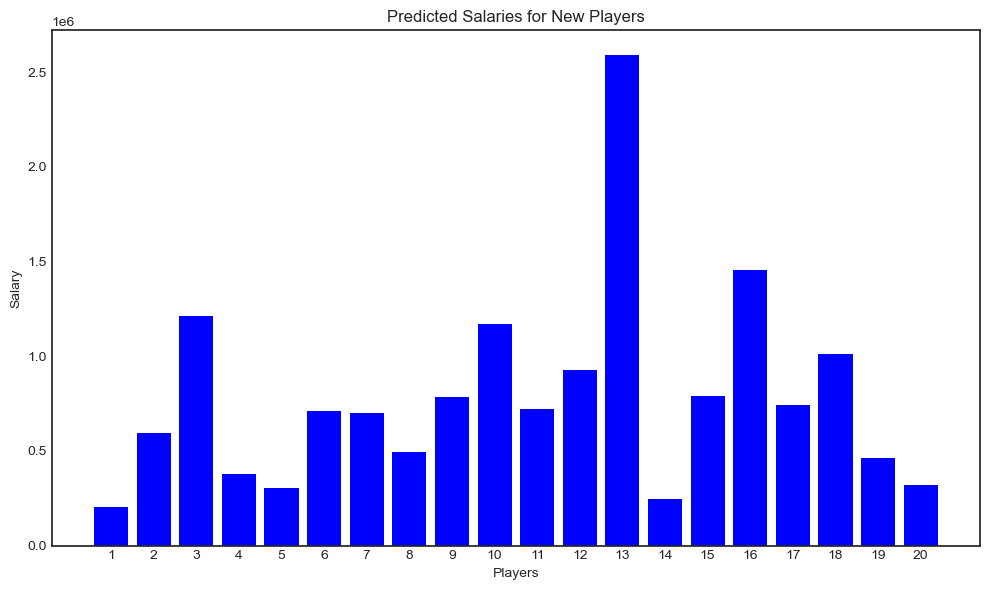

In [63]:
# Predict the log-salary using the final model
predicted_logsalary = fit_final.predict(new_baseball)

# Transform the log-salary values back to regular salary values
predicted_salary = np.exp(predicted_logsalary)


# Create a bar plot for the predicted salaries with player indices as ticks
player_indices = np.arange(len(predicted_salary))  # Player indices from 0 to 19
player_indices += 1
plt.figure(figsize=(10, 6))
plt.bar(player_indices, predicted_salary * 1000, color='b', label='Predicted Salary')
plt.xlabel('Players')
plt.ylabel('Salary')
plt.title('Predicted Salaries for New Players')
plt.xticks(player_indices, player_indices)  # Set player indices as ticks on the X-axis
plt.tight_layout()
plt.show()

Since we do not have the actual salaries of these players, we cannot determine our model's accuracy or make an error bar plot. However, we can make a plot of the player's individual expected salaries. It looks like the 13th player in our dataset is going to be a very successful player, and make about 2.5 million dollars!

In [64]:
new_baseball.iloc[12] #This is the 13th player's stats

batting.avg           0.225
OBP                   0.322
runs                 25.000
hits                174.000
doubles               6.000
triples               1.000
homeruns              1.000
RBI                  62.000
walks                30.000
strike.outs          24.000
stolen.bases         15.000
errors                9.000
free.agency.elig      1.000
free.agent.91         0.000
arb.elig              0.000
arb.91                0.000
Name: 12, dtype: float64